# Multiple linear regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

In [2]:
data= pd.read_csv("C:\\Users\\Dell\\Downloads\\50_Startups.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
data.shape

(50, 5)

In [7]:
data.skew()

C:\Users\Dell\AppData\Local\Temp/ipykernel_14992/1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


R&D Spend          0.164002
Administration    -0.489025
Marketing Spend   -0.046472
Profit             0.023291
dtype: float64

In [8]:
data.var()

C:\Users\Dell\AppData\Local\Temp/ipykernel_14992/445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


R&D Spend          2.107017e+09
Administration     7.849973e+08
Marketing Spend    1.495492e+10
Profit             1.624588e+09
dtype: float64

In [9]:
data.kurt()

C:\Users\Dell\AppData\Local\Temp/ipykernel_14992/2907027414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurt()


R&D Spend         -0.761465
Administration     0.225071
Marketing Spend   -0.671701
Profit            -0.063859
dtype: float64

## Correlation 

In [10]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


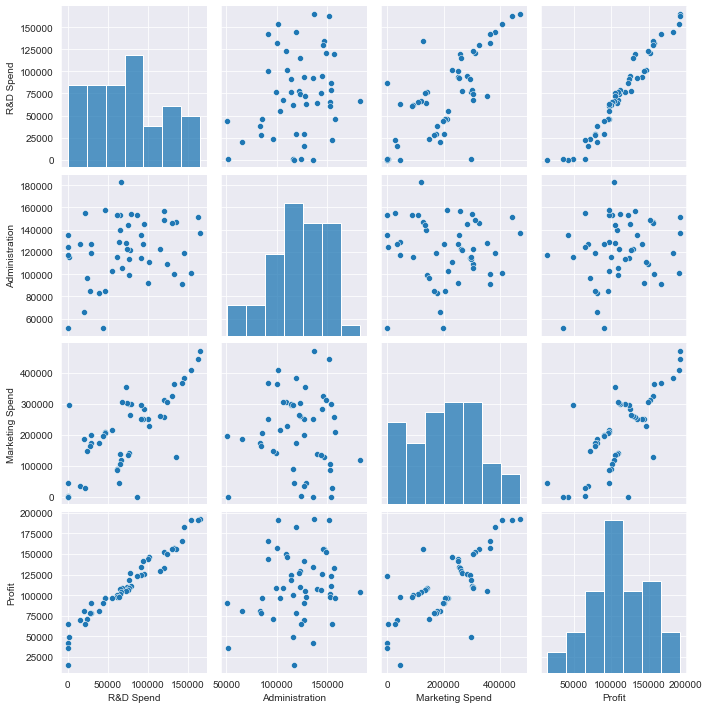

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

## Get dummies 

In [12]:
Data=pd.get_dummies(data['State'])

In [13]:
Data.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [14]:
data= pd.concat([data,Data],axis=1)

data= data.drop(["State"],axis=1)


In [15]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [16]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


# Scatter plot between variables along with histogram

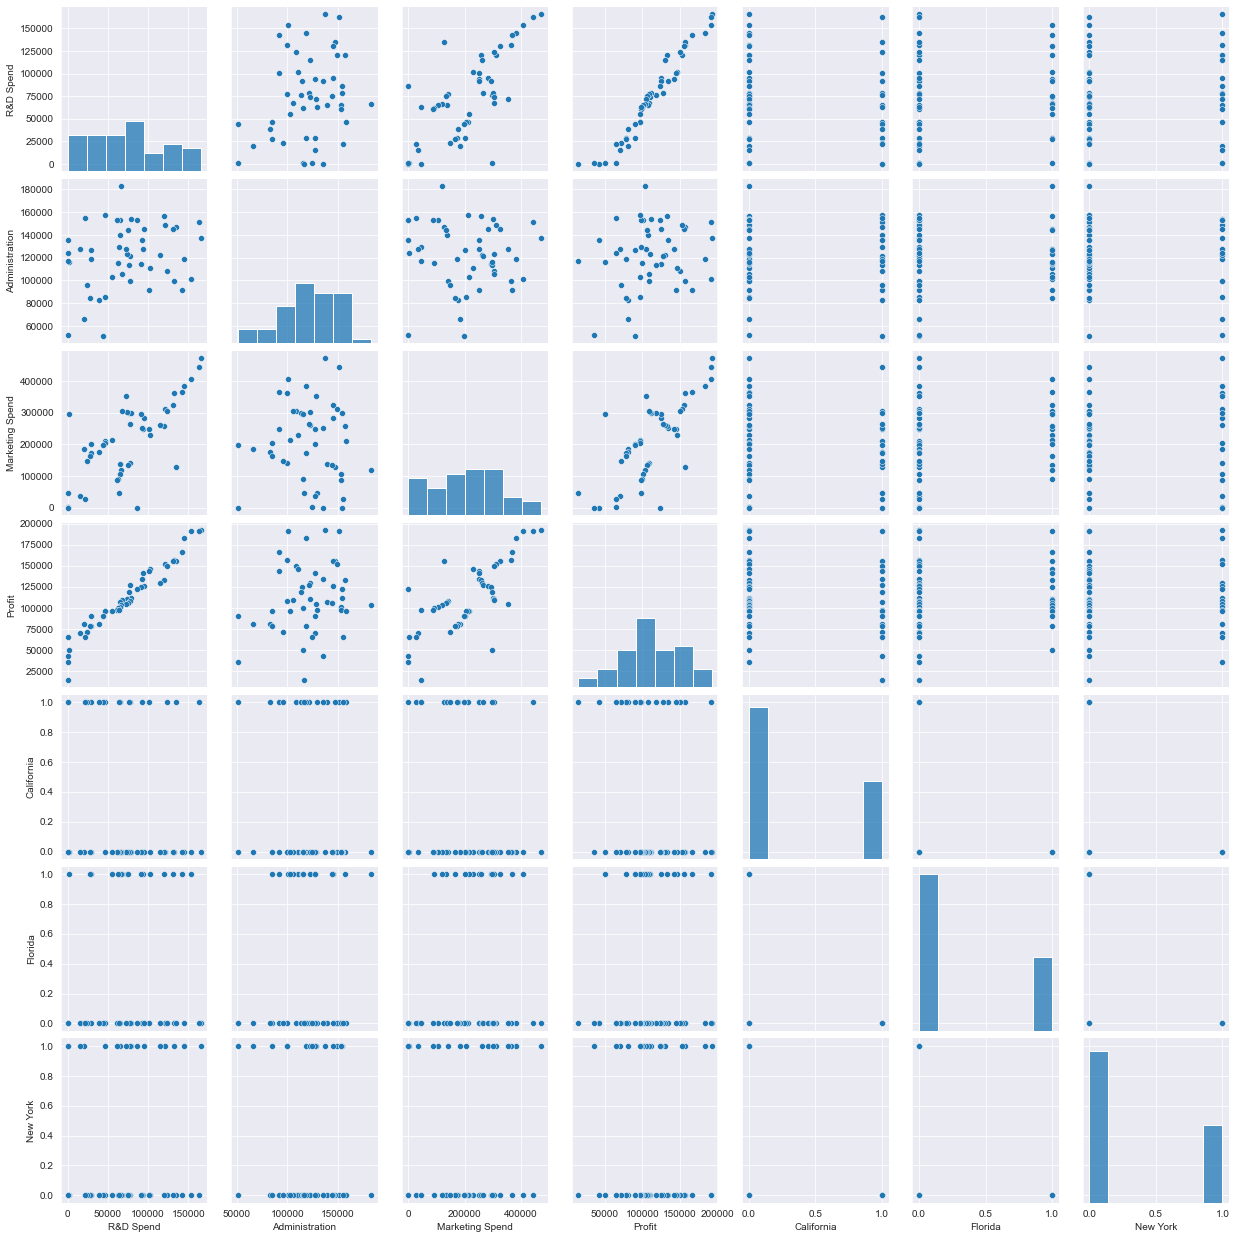

In [17]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [18]:
#To build a model easily rename all the columns to short forms
data=data.rename(columns={'R&D Spend':'RD'})
data=data.rename(columns={'Administration':'AD'})
data=data.rename(columns={'Marketing Spend':'MS'})
data=data.rename(columns={'New York':'NY'})
data.head()

,RD,AD,MS,Profit,California,Florida,NY
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


# Model building

In [19]:
model = smf.ols('Profit~RD+AD+MS+California+Florida+NY',data=data).fit()
model

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.34e-27
Time:                        22:19:26   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RD             0.8060      0.046     17.369      0.000       0.712       0.900
AD            -0.0270      0.052     -0.517      0.608      -0.132       0.078
MS             0.0270      0.017      1.574      0.123      -0.008       0.062
California  1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
Florida     1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
NY          1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.98e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.37e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
#coefficients
model.params

Intercept     37633.233317
RD                0.806023
AD               -0.027004
MS                0.026980
California    12492.110514
Florida       12690.899307
NY            12450.223495
dtype: float64

In [22]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept      7.417409
RD            17.368580
AD            -0.517012
MS             1.573889
California     5.099242
Florida        4.654306
NY             5.007401
dtype: float64 
 Intercept     2.807645e-09
RD            2.578772e-21
AD            6.077373e-01
MS            1.226769e-01
California    6.942555e-06
Florida       2.992503e-05
NY            9.409010e-06
dtype: float64


In [23]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

By above model we can say that this model is accurate upto some 94% percent. But columns like 'ADMINISTRATION' AND 'MARKET SPEND' are not in the acceptance level.
So,far by using some metrics we have to built a better model by droping outliers and unusual values.

# Simple linear models

In [24]:
ml_a=smf.ols('Profit~AD',data = data).fit()  
#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept    3.040044
AD           1.419493
dtype: float64 
 Intercept    0.003824
AD           0.162217
dtype: float64


In [25]:
ml_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 22 Dec 2021   Prob (F-statistic):              0.162
Time:                        22:19:27   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
AD             0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

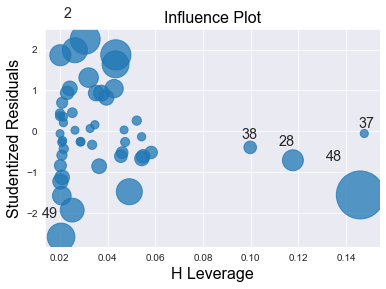

<Figure size 2160x1080 with 0 Axes>

In [26]:
#for outlier detection
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(ml_a)
plt.figure(figsize=(30,15))
plt.show()

Here from above influence plot we detect some major outlier like data point=48 
By dropping that data point we may easily increase accuracy of model

In [27]:
Data1=data.drop(data.index[[48,49]],axis=0).reset_index()

In [28]:
ml_a2=smf.ols('Profit~AD',data = Data1).fit()  
#t and p-Values
print(ml_a.tvalues, '\n', ml_a.pvalues)  

Intercept    3.040044
AD           1.419493
dtype: float64 
 Intercept    0.003824
AD           0.162217
dtype: float64


In [29]:
ml_a2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.5683
Date:                Wed, 22 Dec 2021   Prob (F-statistic):              0.455
Time:                        22:19:27   Log-Likelihood:                -571.96
No. Observations:                  48   AIC:                             1148.
Df Residuals:                      46   BIC:                             1152.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.691e+04   2.54e+04      3.816      0.000    4.58e+04    1.48e+05
AD             0.1523      0.202      0.754      0.455      -0.254       0.559
==============================================================================
Omnibus:                        1.112   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                1.122
Skew:                           0.332   Prob(JB):                        0.571
Kurtosis:                       2.652   Cond. No.                     5.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Even after dropping the outliers this model not at acceptance level for that we have use some more metrics toe make an optimum model

In [30]:
ml_m=smf.ols('Profit~MS',data = Data1).fit()  
#t and p-Values
print(ml_m.tvalues, '\n', ml_m.pvalues)  

Intercept    8.421166
MS           7.000448
dtype: float64 
 Intercept    7.135118e-11
MS           9.098102e-09
dtype: float64


In [31]:
ml_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     49.01
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           9.10e-09
Time:                        22:19:28   Log-Likelihood:                -554.84
No. Observations:                  48   AIC:                             1114.
Df Residuals:                      46   BIC:                             1117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.672e+04   7923.084      8.421      0.000    5.08e+04    8.27e+04
MS             0.2235      0.032      7.000      0.000       0.159       0.288
==============================================================================
Omnibus:                        4.593   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.078
Skew:                          -0.348   Prob(JB):                        0.130
Kurtosis:                       4.246   Cond. No.                     5.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
ml_2=smf.ols('Profit~MS+AD',data = Data1).fit() 

In [33]:
ml_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     28.94
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           8.32e-09
Time:                        22:19:28   Log-Likelihood:                -552.41
No. Observations:                  48   AIC:                             1111.
Df Residuals:                      45   BIC:                             1116.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.755e+04   1.94e+04      1.419      0.163   -1.16e+04    6.67e+04
MS             0.2333      0.031      7.525      0.000       0.171       0.296
AD             0.3013      0.137      2.193      0.033       0.025       0.578
==============================================================================
Omnibus:                        6.308   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.486
Skew:                          -0.457   Prob(JB):                       0.0391
Kurtosis:                       4.551   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [34]:
rsq_RD = smf.ols('RD~MS+AD',data=data).fit().rsquared  
vif_RD = 1/(1-rsq_RD) 

rsq_AD = smf.ols('AD~RD+MS',data=data).fit().rsquared  
vif_AD = 1/(1-rsq_AD)

rsq_MS = smf.ols('MS~RD+AD',data=data).fit().rsquared  
vif_MS = 1/(1-rsq_MS) 

# Storing vif values in a data frame
d1 = {'Variables':['RD','MS','AD'],'VIF':[vif_RD,vif_AD,vif_MS]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD,2.468903
1,MS,1.175091
2,AD,2.326773


All VIF values are below 10 

# Residual analysis

## Test for Normality of Residuals (Q-Q Plot)

C:\Users\Dell\anaconda32\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


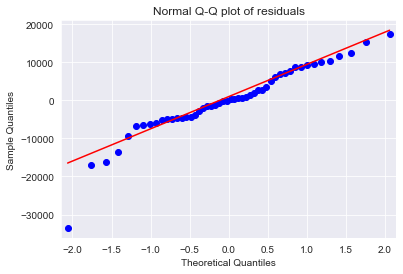

In [35]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [36]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

# Residual Plot for Homoscedasticity

In [37]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

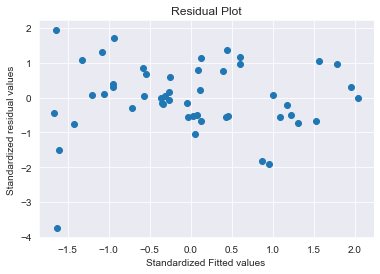

In [38]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Model Deletion Diagnostics


## Detecting Influencers/Outliers using Cook's distance

In [39]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

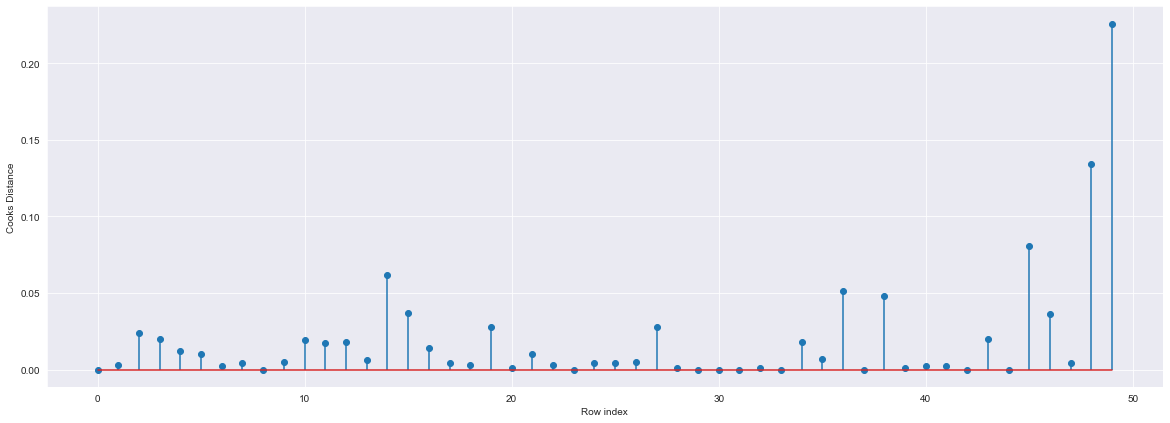

In [40]:
ig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
(np.argmax(c),np.max(c))

(49, 0.22625094501509238)

By deleting the out most outliers like datapoints 48,49 we created a new data set as 'Data1'

In [42]:
model1 = smf.ols('Profit~RD+AD+MS+California+Florida+NY',data=Data1).fit()
model1

In [43]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     217.6
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           7.02e-29
Time:                        22:19:29   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             998.5
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.409e+04   4569.825      9.648      0.000    3.49e+04    5.33e+04
RD             0.7888      0.037     21.160      0.000       0.714       0.864
AD            -0.0621      0.045     -1.381      0.174      -0.153       0.029
MS             0.0179      0.014      1.275      0.209      -0.010       0.046
California   1.53e+04   2035.915      7.516      0.000    1.12e+04    1.94e+04
Florida     1.415e+04   2261.128      6.259      0.000    9588.163    1.87e+04
NY          1.464e+04   2223.793      6.581      0.000    1.01e+04    1.91e+04
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.453
Skew:                           0.108   Prob(JB):                        0.797
Kurtosis:                       2.576   Cond. No.                     1.36e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Due to low correlation between Profit and AD(Administration) and by high non acceptance probvability level of we are dropping column("AD")

In [44]:
model2 = smf.ols('Profit~RD+MS+California+Florida+NY',data=Data1).fit()
model2

In [45]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.02e-29
Time:                        22:19:29   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.83e+04   1841.077     20.803      0.000    3.46e+04     4.2e+04
RD             0.7692      0.035     22.072      0.000       0.699       0.840
MS             0.0251      0.013      1.908      0.063      -0.001       0.052
California  1.353e+04   1599.496      8.461      0.000    1.03e+04    1.68e+04
Florida     1.216e+04   1761.727      6.904      0.000    8609.549    1.57e+04
NY           1.26e+04   1685.592      7.478      0.000    9204.975     1.6e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.46e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.55e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
model2_influence = model2.get_influence()
(c, _) = model2_influence.cooks_distance

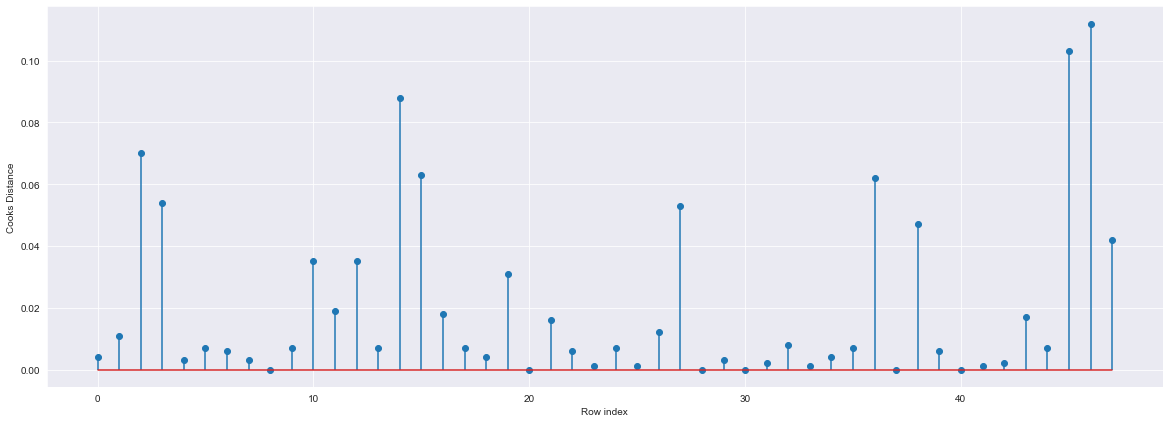

In [47]:
ig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
(np.argmax(c),np.max(c))

(46, 0.11249684644488024)

In [49]:
data2=Data1.drop(Data1.index[[46]],axis=0).reset_index()

# Final model

In [50]:
model = smf.ols('Profit~RD+MS+California+Florida+NY',data=data2).fit()
model

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     253.5
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           8.29e-29
Time:                        22:19:30   Log-Likelihood:                -483.34
No. Observations:                  47   AIC:                             976.7
Df Residuals:                      42   BIC:                             985.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.869e+04   1837.843     21.054      0.000     3.5e+04    4.24e+04
RD             0.7447      0.038     19.443      0.000       0.667       0.822
MS             0.0325      0.014      2.328      0.025       0.004       0.061
California  1.341e+04   1581.417      8.480      0.000    1.02e+04    1.66e+04
Florida      1.27e+04   1778.684      7.142      0.000    9114.033    1.63e+04
NY          1.258e+04   1664.233      7.560      0.000    9222.491    1.59e+04
==============================================================================
Omnibus:                        0.106   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.306
Skew:                           0.052   Prob(JB):                        0.858
Kurtosis:                       2.618   Cond. No.                     2.03e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.82e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [52]:
(model.rsquared,model.rsquared_adj)

(0.9602203518326193, 0.9564318139119165)

Hence the model with an 96% accuracy level.

# Transformations

In [5]:
data= pd.read_csv("C:\\Users\\Dell\\Downloads\\50_Startups.csv")

In [6]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In data (startup.csv) profit and administration are very low correlated in these type of cases
We have to do some transformations for administration to get the best fit.

In [ ]:
d1=(data['Profit'])
d2=np.log10(data['Administration'])
datalog = pd.DataFrame(data=(d1,d2))
datalog

In [ ]:
datalog=datalog.transpose()

In [ ]:
datalog.plot.scatter(x='Profit',y='Administration')

In [ ]:
datalog.corr()

In [ ]:
d1=(data['Profit'])
d2=np.sqrt(data['Administration'])
datasq=pd.DataFrame(data=(d1,d2))
datasq.head()

In [ ]:
datasq=datasq.transpose()

In [ ]:
datasq.plot.scatter(x='Profit',y='Administration')

In [ ]:
datasq.corr()

In [ ]:
d1=(data['Profit'])
d2=np.exp(data['Administration'])
dataexp=pd.DataFrame(data=(d1,d2))
dataexp.head()

In [ ]:
d1=(data['Profit'])
d2=1/(data['Administration'])
datare = pd.DataFrame(data=(d1,d2))
datare.head()

In [ ]:
datare=datare.transpose()

In [ ]:
datare.plot.scatter(x='Profit',y='Administration')

In [ ]:
datare.corr()

By applying any transformations we didn't get best relation for 'Profit' and 'Administration'